# Machine Learning

## Random Forest

* **1º caso: Treinando o modelo com todas as features**

In [1]:
# Carregando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Carregando base de dados

dados = pd.read_csv('/content/drive/MyDrive/Meus Scripts/Data Science do Zero/Dados/xAPI-Edu-Data.csv')

In [3]:
# Visualizando os dados

dados.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L


**Explorando os dados**

In [4]:
# Verificando a distribuição das classes

dados['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

In [5]:
# Verificando a existência de valores nulos

dados.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

**Codificando os atributos: aplicando o Label Encoder**

In [6]:
dados_2 = dados
codifica = dados_2.dtypes.pipe(lambda dados_2: dados_2[dados_2 == 'object']).index
for x in codifica:
  modelo_label = LabelEncoder()
  dados_2[x] = modelo_label.fit_transform(dados_2[x])

In [7]:
# Visualizando os dados

dados_2.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1


**Dividindo os dados em treino e teste**

In [8]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(
    dados.drop('Class', axis = 1,), dados['Class'], test_size = 0.3,
    random_state = 0
)

In [9]:
# Verificando distribuição dos dados

X_treino.shape, X_teste.shape

((336, 16), (144, 16))

In [10]:
# Verificando distribuição dos dados

y_treino.shape, y_teste.shape

((336,), (144,))

**Instânciando, treinando e aplicando o modelo**

In [11]:
# Instânciando o modelo

modelo = RandomForestClassifier()

In [12]:
# Treinando o modelo

modelo.fit(X_treino, y_treino)

RandomForestClassifier()

In [13]:
# Aplicando o modelo aos dados de teste

resultado = modelo.predict(X_teste)

**Métricas de Validação**

In [14]:
from sklearn import metrics
print(metrics.classification_report(y_teste, resultado))

              precision    recall  f1-score   support

           0       0.71      0.64      0.68        39
           1       0.82      0.94      0.88        34
           2       0.77      0.76      0.77        71

    accuracy                           0.77       144
   macro avg       0.77      0.78      0.77       144
weighted avg       0.77      0.77      0.77       144



* **2º caso: Treinando o modelo com as features mais importantes**

In [15]:
# Verificando as features mais importantes para o modelo

modelo.feature_importances_

array([0.02271083, 0.03344412, 0.03446871, 0.01742866, 0.03587709,
       0.01983852, 0.04071879, 0.01272613, 0.05068291, 0.16109468,
       0.15763724, 0.12761846, 0.0970085 , 0.03837386, 0.019879  ,
       0.13049252])

In [16]:
# Selecionando as features por ordem descrescente

features = pd.Series(modelo.feature_importances_, index = X_treino.columns).sort_values(ascending = False)

In [17]:
# Visualizando as features de forma gráfica

def grafico_features(lista):
  %matplotlib inline

  plt.figure(figsize = (16, 8))
  sns.barplot(x = lista, y = lista.index)

  plt.xlabel('Feature Importance Score')
  plt.ylabel('Features')
  plt.title('Visualizing Important Features')

  plt.show()

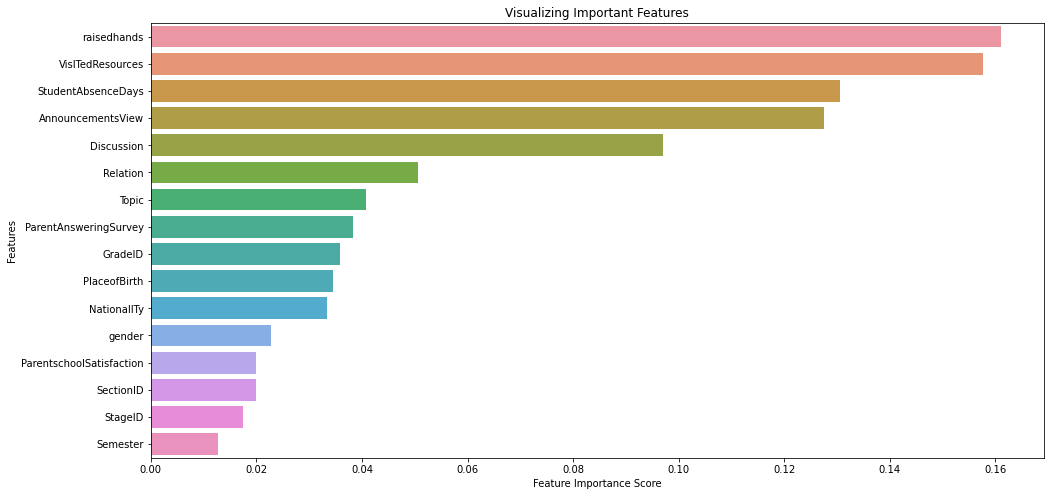

In [18]:
grafico_features(features)

**Selecionando features acima de determinado score**

In [19]:
n_features = [] # Criando uma lista vazia para adicionar as features

for x_features, important in features.iteritems():
  if important > 0.03:
    n_features.append(x_features)

**Separando os dados em treino e teste**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    dados[n_features],
    dados['Class'],
    test_size = 0.3,
    random_state = 0
)

**Instânciando, treinando e aplicando o modelo**

In [21]:
# Instânciando o modelo
modelo_2 = RandomForestClassifier(random_state = 0)

In [22]:
# Treinando o modelo
modelo_2.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [23]:
# Aplicando o modelo nos dados de teste
resultado_2 = modelo_2.predict(X_test)

**Métricas de Validação**

In [24]:
from sklearn import metrics
print(metrics.classification_report(y_test, resultado_2))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71        39
           1       0.82      0.91      0.86        34
           2       0.79      0.73      0.76        71

    accuracy                           0.77       144
   macro avg       0.77      0.79      0.78       144
weighted avg       0.77      0.77      0.77       144

